In [1]:
import parse_data.prepare_data as prepare_data
import globals
from plotting import plot_octagon, plot_trajectory
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

### Plot the probability of choosing High across solo and social conditions

In [ ]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [3]:
_, trial_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_all_solo, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-50_JerryFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-56_JerrySecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through player

In [4]:
_, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [8]:
(probability_choose_high_social_array,
probability_choose_high_solo_array,
probability_choose_high_solo_array_first_session,
probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trial_lists_solo,
                                                                                                                                        trial_lists_social,
                                                                                                                                        wall_sep=None,
                                                                                                                                        trial_type=globals.HIGH_LOW,
                                                                                                                                        cut_solo_trials=10)  

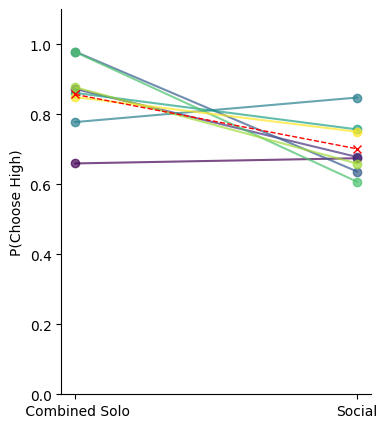

In [9]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

NaN value in probabilities: [       nan 0.75       0.80952381]. Dropping this point from the separated plot.


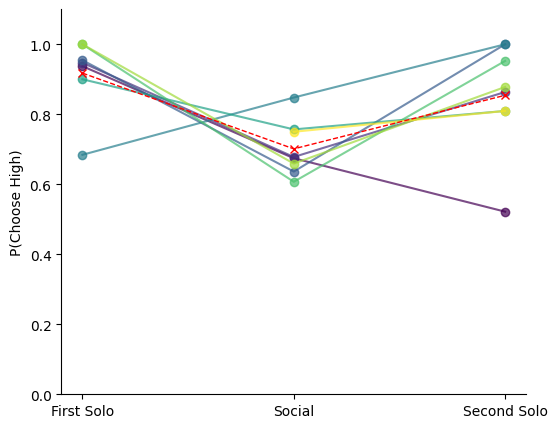

In [10]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [21]:
for trial_list in trial_lists_solo:

    trial_list = trial_list[10:]
    
    a = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in a]

    b = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=2)
    trial_list = [trial_list[i] for i in b]

    print(len(trial_list))


6
5
4
12
10
7
7
7
4
7
4
9
3
20
0
19


### Plot the probability of choosing the low wall across different conditions

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2
2, 2


d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired")


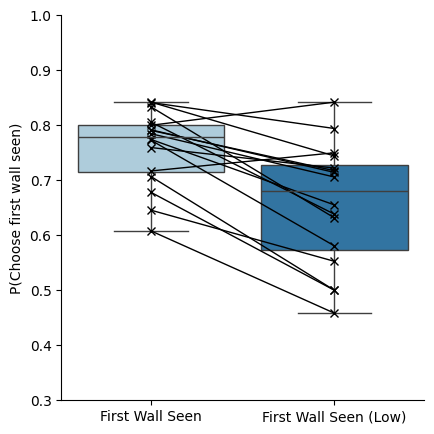

In [8]:
(probability_first_wall_chosen_when_low_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists_social)

wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, ] 
wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)']

plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels)

### Plot performance against probability of choosing Low when Low first visibile 

In [ ]:
trial_lists_social_drop_5 = [trial_list for i,trial_list in enumerate(trial_lists_social) if i != 5]

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


Probability low when first visible: 
 [[0.70588235 0.72222222]
 [0.84210526 0.5       ]
 [0.45833333 0.79411765]
 [0.7173913  0.63829787]
 [0.71428571 0.63157895]
 [0.58064516 0.75      ]
 [0.74418605 0.5       ]
 [0.65517241 0.55263158]]
Proportion of scores for all sessions 
 [[0.42406312 0.57593688]
 [0.37438424 0.62561576]
 [0.42009132 0.57990868]
 [0.33567416 0.66432584]
 [0.37628866 0.62371134]
 [0.79399142 0.20600858]
 [0.492569   0.507431  ]
 [0.38533835 0.61466165]]


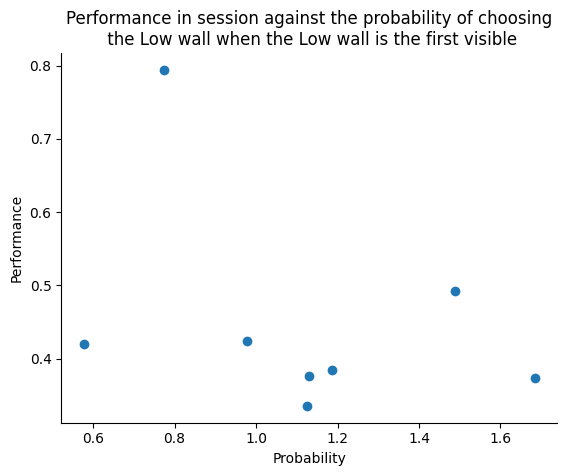

In [ ]:
plot_probability_chose_wall.plot_performance_against_probability_low_when_first_visible_df(trial_lists_social, correlation_line=False)